# Required Dataset: Video games sales dataset                                                 Dataset Link:                                               https://www.kaggle.com/datasets/ibriiee/video-games-sales-dataset-2022-updated-extra-feat                                                                                                     The task is to predict the sales performance of several video games worldwide; to classify and cluster the video games based on some categorical variables. And our stakeholders would like to know the following:                                            a. Which of the variables in the video game dataset or a combination of them best predicts “global sales” of video games and why?                                         b. What effect will the number of critics and users as well as their review scores have on the sales of Video games in North America, EU and Japan?                    c. What propelled the choice of regressor?                                                                d. Using all the relevant categorical variables in the Video Game Dataset as the target variable at each instance and determine which of the variables performed best in classifying the dataset. Explain your findings.                         e. How did you check whether your models did not overfit?                                  f. Can your classification models be deployed in practice based on their performances?                                                                                                                g. In the video game dataset, use a relevant categorical variable and other relevant noncategorical variables to form groups at each instance. By employing internal andexternal evaluation metrics, determine which categorical variable best describes the groups formed. 

In [ ]:
# import mplcyberpunk
# plt.style.use('cyberpunk')
import pandas as pd
import numpy as np
from time import time
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set_style('darkgrid')
from sklearn.metrics import f1_score
import warnings

#setting our display and warnings options
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [ ]:
df = pd.read_csv('/kaggle/input/video-games-sales-dataset-2022-updated-extra-feat/Video_Games.csv')
df.head()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

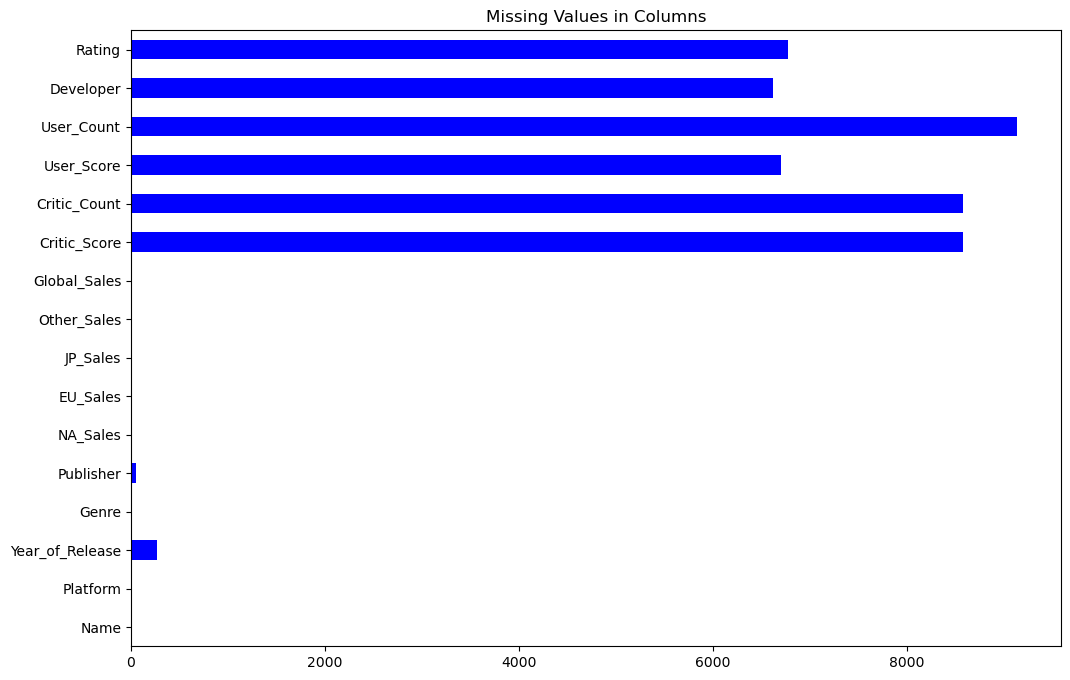

In [ ]:
plt.title('Missing Values in Columns')
df.isnull().sum().plot(kind ='barh',figsize =(12,8),color = 'b')
plt.show()

## Data Cleaning

In [ ]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [ ]:
anomaly = []
for score in df.User_Score.values:
    try :
        eval(score)
    except:
        anomaly.append(score)
np.unique(anomaly)

array(['nan', 'tbd'], dtype='<U32')

In [ ]:
# Replacing the "tbd" value with Nan
df['User_Score'] = pd.to_numeric(df.User_Score.replace(['nan','tbd'],np.NaN))

In [ ]:
categorical_features = ['Developer','Rating','Genre','Platform','Publisher', 'Name']
numeric_features = ['Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Year_of_Release']

In [ ]:
# Encoding the categorical features
from sklearn.preprocessing import LabelEncoder, StandardScaler
label = LabelEncoder()
df[categorical_features] = df[categorical_features].apply(LabelEncoder().fit_transform)

# scaling the numerical columns
scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])


In [ ]:
# Filling the Nan values of the categorical features with the most frequet values
df[categorical_features].fillna(df[categorical_features].mode(),inplace =True)

# Filling the Nan values of the numerical features with the mean value
df[numeric_features] = df[numeric_features].fillna(df[numeric_features].median())

In [ ]:
df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,11075,26,-0.082900,10,361,41.36,28.96,3.77,8.45,82.53,0.504568,1.298211,0.583339,0.284671,1020,1
1,9389,11,-3.655048,4,361,29.08,3.58,6.81,0.77,40.24,0.145819,-0.282456,0.249985,-0.246291,1696,8
2,5613,26,0.257304,6,361,15.68,12.76,3.79,3.29,35.52,0.935067,2.457367,0.783351,0.974209,1020,1
3,11077,26,0.427407,10,361,15.61,10.93,3.28,2.95,32.77,0.791568,2.457367,0.583339,0.053043,1020,1
4,7392,5,-1.783923,7,361,11.27,8.89,10.22,1.00,31.37,0.145819,-0.282456,0.249985,-0.246291,1696,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,8343,17,1.618122,0,503,0.00,0.00,0.01,0.00,0.01,0.145819,-0.282456,0.249985,-0.246291,1696,8
16715,5160,28,-0.082900,10,91,0.00,0.01,0.00,0.00,0.01,0.145819,-0.282456,0.249985,-0.246291,1696,8
16716,3890,20,1.618122,1,233,0.00,0.00,0.01,0.00,0.01,0.145819,-0.282456,0.249985,-0.246291,1696,8
16717,9028,6,-0.593207,4,549,0.01,0.00,0.00,0.00,0.01,0.145819,-0.282456,0.249985,-0.246291,1696,8


In [ ]:
features = df.drop(['Global_Sales'], axis=1)
target = 'Global_Sales'

X = features
y = df[target]

In [ ]:
# check the final params of best model
# best.get_params()

In [ ]:
# check the residuals of trained model
# plot_model(best, plot = 'residuals_interactive')

In [ ]:
# plot_model(best, plot = 'feature')

In [ ]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [ ]:
X = df[['Critic_Count', 'Developer', 'Publisher', 'Year_of_Release', 'Platform', 'EU_Sales', 'NA_Sales', 'JP_Sales', 'Other_Sales']]
y = df['Global_Sales']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1,shuffle=True)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
rf = RandomForestRegressor(n_estimators=100,max_depth = 8)
rf.fit(X_train,y_train)
preds = rf.predict(X_test)
print(f'Model has a mean absolute error of {mean_absolute_error(y_test,preds)} \n RMSE of {mean_squared_error(y_test,preds,squared= False)} \n R-Squared Score of {r2_score(y_test,preds)}')

Model has a mean absolute error of 0.05387954760253995 
 RMSE of 0.24072466696381353 
 R-Squared Score of 0.9688257821276116


In [ ]:
new_X = df.drop(['Global_Sales'], axis=1)
new_y = df['Global_Sales']

In [ ]:
new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(new_X, new_y, test_size=0.3, random_state=1,shuffle=True)

In [ ]:
new_rf = RandomForestRegressor(n_estimators=100,max_depth = 8)
new_rf.fit(new_X_train,new_y_train)
new_preds = new_rf.predict(new_X_test)
print(f'Model has a mean absolute error of {mean_absolute_error(new_y_test,new_preds)} \n RMSE of {mean_squared_error(new_y_test,new_preds,squared= False)} \n R-Squared Score of {r2_score(new_y_test,new_preds)}')

Model has a mean absolute error of 0.0539568793955852 
 RMSE of 0.2115832849251694 
 R-Squared Score of 0.9759166394145063


In [ ]:
new_rf.score(new_X_train, new_y_train)

0.9869408739871143

In [ ]:
new_rf.score(new_X_test, new_y_test)

0.9790394477514845

In [9]:
# The combination of ‘Critic count’, ‘Publisher’, ‘Platform’, ‘Developer’, ‘Year of release’,
#‘EU sales’ , ‘NA sales’, ‘JP sales’, ‘Other sales’ gave a
#mean absolute error of 0.05267719258574051
#RMSE of 0.21730478771501296
#R-Squared Score of 0.974596534463229
#While a combination of all the variables and columns except the ‘Global Sales’ which is our
#target gave a value of
#Model has a mean absolute error of 0.05237759510453901
#RMSE of 0.21143641410467168
#R-Squared Score of 0.9759500628040196
#Hence, the variables except ‘Global Sales’ best predicts because it has the highest R square
value and lowest mean square error.


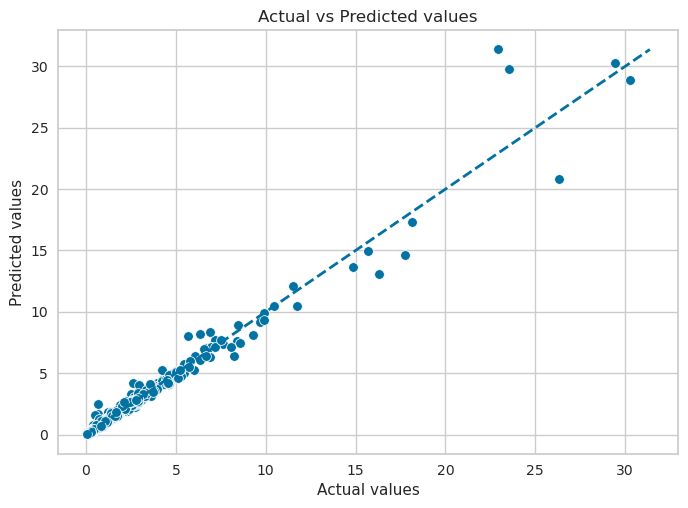

In [ ]:
#  How to check for overfitting of the model
# Plot actual vs predicted values
sns.scatterplot(y=y_test,x=new_preds)
plt.plot([np.min(y_test), np.max(y_test)], [np.min(y_test), np.max(y_test)], 'k--', lw=2, color='b')  # add line of equal values
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted values')
plt.show()


In [6]:
#A scatterplot was used to show overfitting and it was seen that the predictions are moving in the same direction of the line and a best fit of the whole prediction line was drawn to showwhether or not there is overfitting.

# Effect of critic score, count, user score, count etc on sales

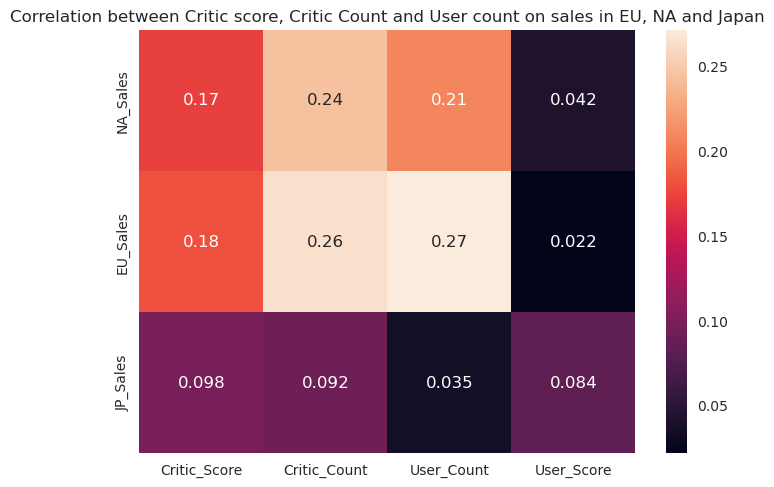

In [ ]:
# plotting correlation heatmap
data_plot = sns.heatmap(df.corr().loc[['NA_Sales','EU_Sales','JP_Sales'],['Critic_Score','Critic_Count','User_Count','User_Score']], annot=True)
plt.title('Correlation between Critic score, Critic Count and User count on sales in EU, NA and Japan')
plt.show()

To determine the effects of critics, users and review scores on sales, a correlation analysis
between the features was done and from the hit map presented, and no positive or negative
correlation was observed.
This plot shows a correlation analysis of count ,and scores against sales and no
positive or negative correlation was discovered.

## Effect on EU sales

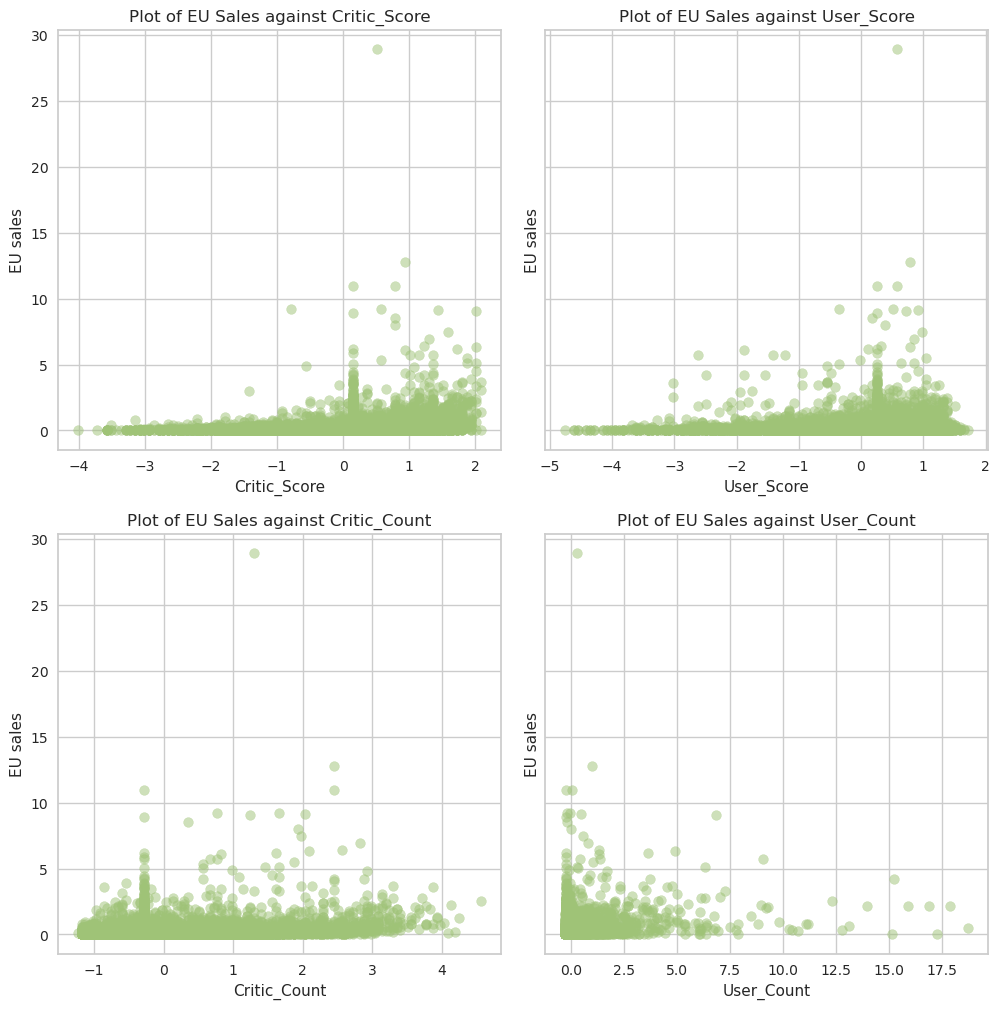

In [ ]:
cols = ['Critic_Score','Critic_Count','User_Score','User_Count']
fig, axes = plt.subplots(2, 2,sharey = True, figsize =(12,12))
for i in range(2):
    for j in range(2):
        ind = cols[2*j+i]
        axes[i, j].scatter(df[ind],df['EU_Sales'], color='g', alpha=0.5)
        axes[i, j].set_title(f'Plot of EU Sales against {ind}')
        axes[i, j].set_xlabel(ind)
        axes[i, j].set_ylabel('EU sales')
plt.subplots_adjust(wspace=0.1, hspace=0.2)

In [2]:
###For EU, the higher the positive critic score, the lower the sales, and the lowerthe user and critic count, the higher the sales .

## North America Sales

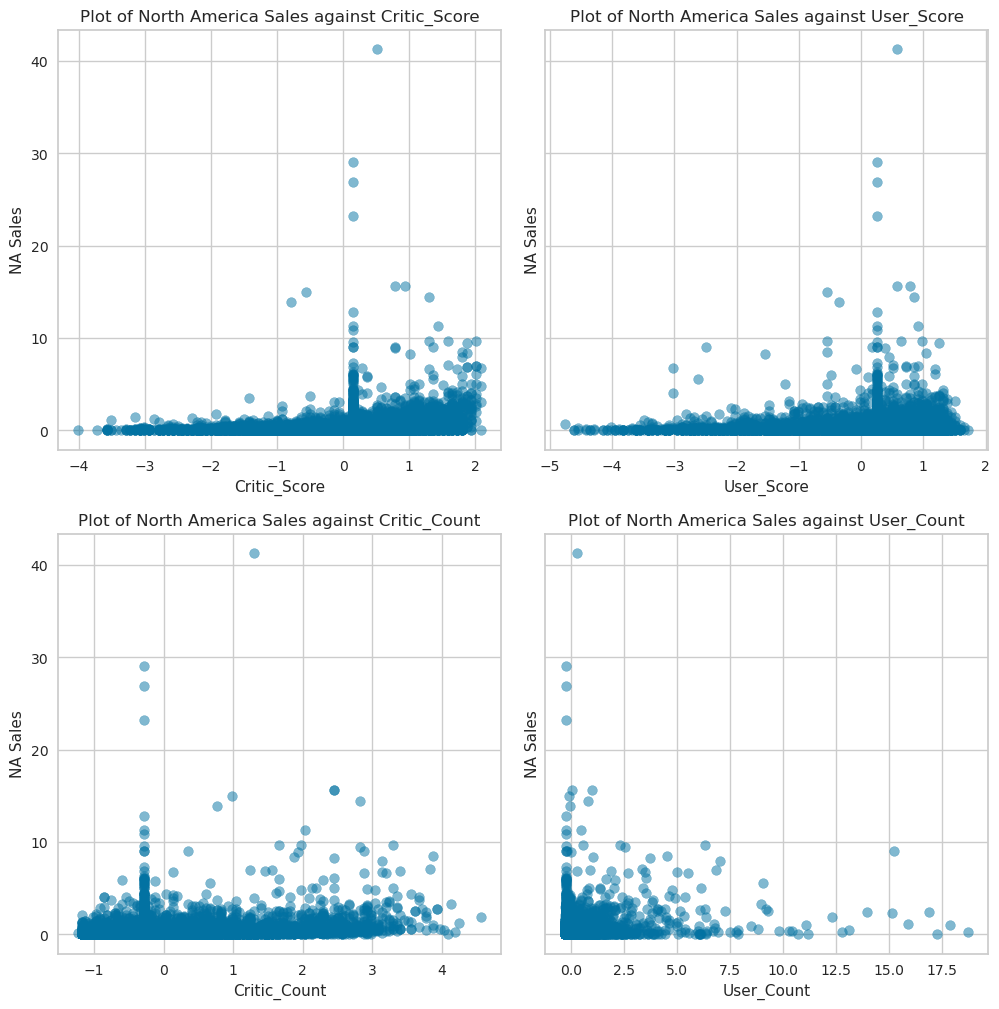

In [ ]:
fig, axes = plt.subplots(2, 2,sharey = True, figsize =(12,12))
for i in range(2):
    for j in range(2):
        ind = cols[2*j+i]
        axes[i, j].scatter(df[ind],df['NA_Sales'], color='b', alpha=0.5)
        axes[i, j].set_title(f'Plot of North America Sales against {ind}')
        axes[i, j].set_xlabel(ind)
        axes[i, j].set_ylabel('NA Sales')
plt.subplots_adjust(wspace=0.1, hspace=0.2)

In [1]:
###For the North America, the higher the positive critic score, the lower the sales, and thehigher the critic count the higher the sales.

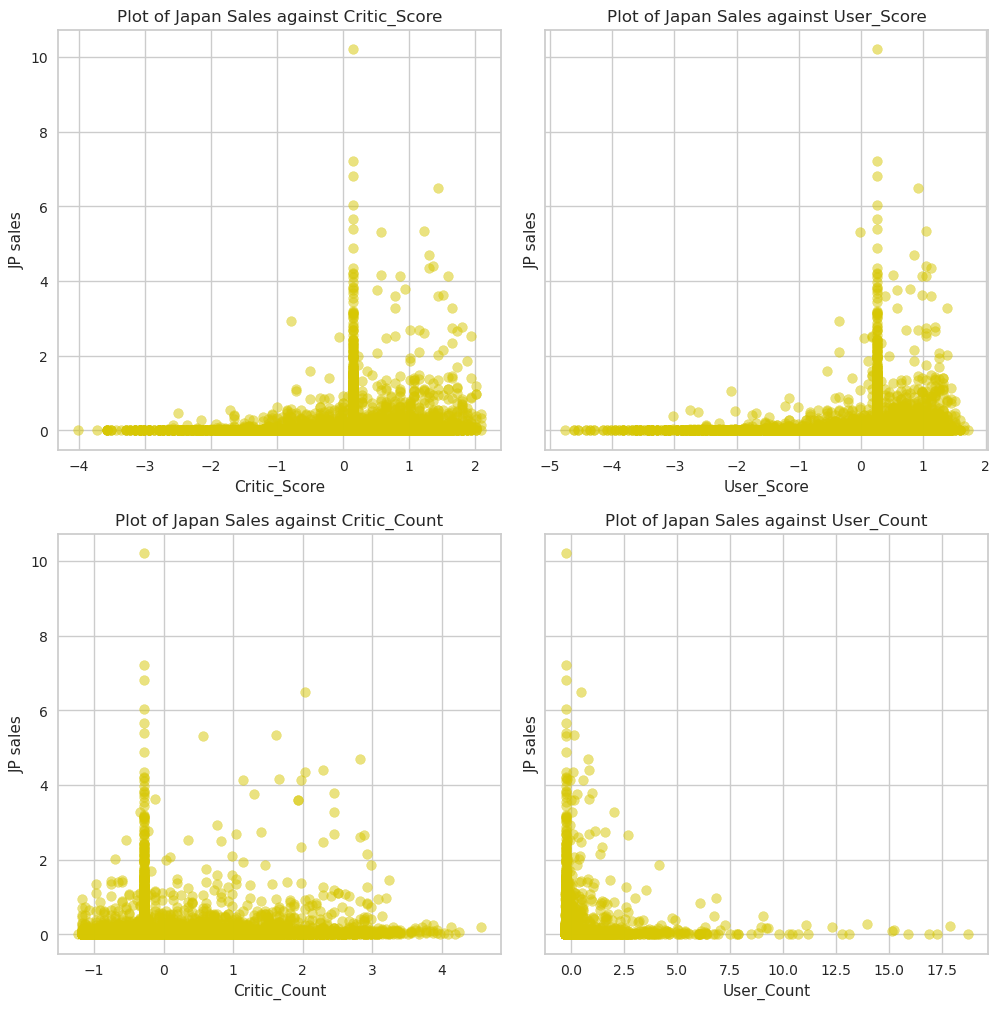

In [ ]:
fig, axes = plt.subplots(2, 2,sharey = True, figsize =(12,12))
for i in range(2):
    for j in range(2):
        ind = cols[2*j+i]
        axes[i, j].scatter(df[ind],df['JP_Sales'], color='y', alpha=0.5)
        axes[i, j].set_title(f'Plot of Japan Sales against {ind}')
        axes[i, j].set_xlabel(ind)
        axes[i, j].set_ylabel('JP sales')
plt.subplots_adjust(wspace=0.1, hspace=0.2)

In [3]:
###For Japan, the higher the critic score, the lower the sales and the lower the user and critic count,the higher the sales.

In [ ]:
from pycaret.regression import *

s = setup(df, target = 'Global_Sales', transform_target = True, log_experiment = True, experiment_name = 'Global_Sales_For_Games')

,Description,Value
0,Session id,3139
1,Target,Global_Sales
2,Target type,Regression
3,Original data shape,"(16719, 16)"
4,Transformed data shape,"(16719, 16)"
5,Transformed train set shape,"(11703, 16)"
6,Transformed test set shape,"(5016, 16)"
7,Numeric features,15
8,Preprocess,True
9,Imputation type,simple


In [ ]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,0.0474,0.4830,0.5111,0.8840,0.0468,0.0567,2.4500
dt,Decision Tree Regressor,0.0703,0.5376,0.6473,0.8057,0.0591,0.0759,0.1450
et,Extra Trees Regressor,0.0769,0.9528,0.8052,0.7376,0.0655,0.0602,1.6530
ada,AdaBoost Regressor,0.2351,1.9009,1.2786,0.3140,0.1863,0.8817,0.5380
knn,K Neighbors Regressor,0.4252,2.2068,1.4071,0.1379,0.3511,2.4472,0.1250
par,Passive Aggressive Regressor,0.4358,2.5047,1.4382,-0.0430,0.3756,2.6172,0.1050
en,Elastic Net,0.4598,2.6171,1.5458,-0.0478,0.4041,2.6007,0.1050
lasso,Lasso Regression,0.4599,2.6172,1.5458,-0.0479,0.4042,2.6037,0.1040
llar,Lasso Least Angle Regression,0.4610,2.6183,1.5462,-0.0485,0.4048,2.6429,0.1290
dummy,Dummy Regressor,0.4610,2.6183,1.5462,-0.0485,0.4048,2.6429,0.1700


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [4]:
###My choice of regressor is the Random forest regressor because it performed best among the others although the tree regressors did good but not when compared with the Random ForestRegressor.Presented above shows quantitatively that the Random Forest Regressor has the least MeanAbsolute Error of 0.0488 when compared with the other Regression methods and the highest R square value of 88%.


In [ ]:
#splitting the data into train and test
train,test = train_test_split(df,test_size=0.3, random_state=42,shuffle=True)

class_results =[]
# importing our classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

for categorical_feat in categorical_features:
    rf = RandomForestClassifier(max_depth = 8, n_estimators =200, random_state = 12)
    features = df.columns.difference([categorical_feat,'Name'])
    target = categorical_feat
    description = f'Model_Accuracy while using"{categorical_feat}" as target *********'
    X_train= train[features]
    y_train = train[target]
    X_test = test[features]
    y_test = test[target]
    kk = np.zeros(shape =(X_test.shape[0],y_train.nunique()))
    rf.fit(X_train,y_train)
    preds= rf.predict(X_test)
    acc = accuracy_score(y_test,preds)
    class_results.append([description,categorical_feat,acc])
    print(description)
    print( f'model has accuracy of: {acc:.3f}' )

Model_Accuracy while using"Developer" as target *********
model has accuracy of: 0.507
Model_Accuracy while using"Rating" as target *********
model has accuracy of: 0.757
Model_Accuracy while using"Genre" as target *********
model has accuracy of: 0.349
Model_Accuracy while using"Platform" as target *********
model has accuracy of: 0.555
Model_Accuracy while using"Publisher" as target *********
model has accuracy of: 0.306
Model_Accuracy while using"Name" as target *********
model has accuracy of: 0.055


In [5]:
# • Developer: this variable had an accuracy of 50% when used as the target.
# • Rating: this variable had an accuracy of 75% when used as the target
# • Genre: this variable had an accuracy of 34% when used as the target
# • Platform: this variable had an accuracy of 55% when used as the target
# • Publisher: this variable had an accuracy of 30% when used as the target
# • Name: this variable had an accuracy of 55% when used as the target

## Question G, In the video game dataset, use a relevant categorical variable and other relevant non-categorical variables to form groups at each instance. By employing internal and external evaluation metrics, determine which categorical variable best describes the groups formed.

## Importing Libraries

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import v_measure_score
from sklearn.metrics import adjusted_mutual_info_score
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score

In [ ]:
relevant_categorical_features = ['Rating', 'Genre', 'Platform']

non_relevant_categorical_features = ['Year_of_Release','NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales',
                            'Critic_Score','Critic_Count', 'User_Score', 'User_Count', 'Rating']

X = df[non_relevant_categorical_features]

In [ ]:
results = []
for col in relevant_categorical_features:
    k = df[col].nunique()
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
  # Get the cluster labels
    labels = kmeans.labels_
    y_true = df[col]
    print(f'Results using {col} for grouping ')
    print(f'********************************')
    # Calculate the v-measure score
    v_measure = v_measure_score(y_true, labels)
    print(f'External Evaluation Measures')
    print(f'********************************')
    print(f'V-measure Score: {v_measure:.3f}')
  # Calculate the Rand index score
    rand_index = adjusted_rand_score(y_true, labels)
    print(f'Rand Index Score: {rand_index:.3f}')
  # Calculate the mutual information score
    mi_score = adjusted_mutual_info_score(y_true, labels)
    print(f'Mutual Information Score: {mi_score:.3f}\n')
  # Calculate the Davies-Bouldin index
    db_score = davies_bouldin_score(X, labels)
    print(f'Internal Evaluation Measures')
    print(f'********************************')
    print(f'Davies-Bouldin Index: {db_score:.3f}')
  # Calculate the Silhouette coefficient
    s_score = silhouette_score(X, labels)
    print(f'Silhouette Coefficient: {s_score:.3f}')
    results.append([col,k, v_measure , rand_index,mi_score,db_score,s_score])

Results using Rating for grouping 
********************************
External Evaluation Measures
********************************
V-measure Score: 0.556
Rand Index Score: 0.432
Mutual Information Score: 0.556

Internal Evaluation Measures
********************************
Davies-Bouldin Index: 1.142
Silhouette Coefficient: 0.324
Results using Genre for grouping 
********************************
External Evaluation Measures
********************************
V-measure Score: 0.085
Rand Index Score: 0.032
Mutual Information Score: 0.084

Internal Evaluation Measures
********************************
Davies-Bouldin Index: 1.147
Silhouette Coefficient: 0.346
Results using Platform for grouping 
********************************
External Evaluation Measures
********************************
V-measure Score: 0.250
Rand Index Score: 0.107
Mutual Information Score: 0.244

Internal Evaluation Measures
********************************
Davies-Bouldin Index: 1.194
Silhouette Coefficient: 0.275


In [ ]:
results_df = pd.DataFrame(np.vstack(results),columns = ['Column','NO of Clusters', 'v_measure','rand_index','mi_score','db_score','s_score'])
for col in results_df.columns[1:]:
    results_df[col] = pd.to_numeric(results_df[col])
results_df

,Column,NO of Clusters,v_measure,rand_index,mi_score,db_score,s_score
0,Rating,9,0.556290,0.432383,0.555855,1.141979,0.323833
1,Genre,13,0.085223,0.031595,0.083502,1.146540,0.346422
2,Platform,31,0.250109,0.106658,0.244057,1.193534,0.275118


In [7]:
###With a Model Accuracy level of 75%, Yes it can be deployed and Since this is a video game dataset and not a life related issue such as Health or Law, it can be deployed.

# Result and Conclusion                                                                                        From the report analysis a combination of variables except the target/label (Global Sales) best predicts and the best choice of regressor is the Forest Regressor due to its low error of 0.04 and high accuracy of 88% and it was decided that an accuracy of 75% for model rating can be deployed in the sales of video games.